# importing the libraries

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

#methods and stopwords text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score


#Machine learning libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


import warnings 
warnings.filterwarnings("ignore")

# Importing the dataset

sentiment: the polarity of the tweet (1 = negative, neutral=3, positive=5)


In [2]:
df=pd.read_csv('Apple-Twitter-Sentiment-DFE.csv',encoding ='ISO-8859-1')
#also you can use the encoding techinque encoding ='ISO-8859-1'
#because if there are any utf-8 charactors then it will give the error
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n5,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12-12-2014 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


# Removing unneccessary columns

In [3]:
df.drop(['_unit_id','_golden','_unit_state','_trusted_judgments','_last_judgment_at','sentiment:confidence','date','id','query','sentiment_gold'],axis='columns',inplace=True)

In [4]:
df.head()

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL


In [5]:
df.tail()

,sentiment,text
3881,3,(Via FC) Apple Is Warming Up To Social Media -...
3882,3,RT @MMLXIV: there is no avocado emoji may I as...
3883,5,@marcbulandr I could not agree more. Between @...
3884,1,My iPhone 5's photos are no longer downloading...
3885,5,RT @SwiftKey: We're so excited to be named to ...


# Replacing the sentiment values:
    negative(1)  with 0
    neutral (3)  with 1
    positive(5)  with 2

In [6]:
df['sentiment'] = df['sentiment'].replace(1,'0')
df['sentiment'] = df['sentiment'].replace(3,'1')
df['sentiment'] = df['sentiment'].replace(5,'2')

In [7]:
df.tail()

,sentiment,text
3881,1,(Via FC) Apple Is Warming Up To Social Media -...
3882,1,RT @MMLXIV: there is no avocado emoji may I as...
3883,2,@marcbulandr I could not agree more. Between @...
3884,0,My iPhone 5's photos are no longer downloading...
3885,2,RT @SwiftKey: We're so excited to be named to ...


In [8]:
df.tail()

,sentiment,text
3881,1,(Via FC) Apple Is Warming Up To Social Media -...
3882,1,RT @MMLXIV: there is no avocado emoji may I as...
3883,2,@marcbulandr I could not agree more. Between @...
3884,0,My iPhone 5's photos are no longer downloading...
3885,2,RT @SwiftKey: We're so excited to be named to ...


In [9]:
df.shape

(3886, 2)

# plotting the distribution of the dataset

In [10]:
# df.isnull().sum()


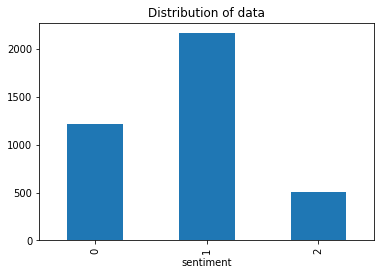

In [11]:
# plt.bar("sentiment",data=df,color='blue')
# plt.show()
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
# ax.set_xticklabels(['Negative','Positive'], rotation=0)


# Storing the data in lists


In [12]:
text,sentiment=list(df['text']),list(df['sentiment'])

# Preprocessing the Text
        1.Casing
        2.Noise Removal
        3.Tokenization
        4.Stopword Removal
        5.Text Normalization(Stemming and Lematization)
        
        The below function will do the same>>>>

In [13]:
stop_words=set(stopwords.words('english'))


In [14]:
def preprocess_tweet_text(tweet):
    
    # convert the text to lower case
    tweet=tweet.lower()
    
    # remove any urls
    tweet=re.sub(r"http\S+|www\S+|https\S+", "",tweet,flags=re.MULTILINE)
    
    # remove punctuations 
    tweet=tweet.translate(str.maketrans("","",string.punctuation))
    
    # remove user '@' references and '#' from tweet
    tweet=re.sub(r"\@\w+|\#","",tweet)
    
    # remove stopwords
    tweet_tokens=word_tokenize(tweet)
    filtered_words=[word for word in tweet_tokens if word not in stop_words]
    
    # stemming 
    ps=PorterStemmer()
    stemmed_words=[ps.stem(w) for w in filtered_words]
    
    # lemmatizing 
    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)

In [15]:
# text.shape

In [16]:
# sentiment.shape

In [17]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [18]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [19]:
import time
t = time.time()
# data_cln=[]
# for d in df['text']:
#         data_cln.append(preprocess_tweet_text(d))
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 2 seconds


In [20]:
# data_cln
processedtext

['aapl the 10 best steve job email ever URL ',
 'rt USER why aapl stock had mini flash crash today aapl aapl URL ',
 'my cat only chew USER cord such an applesnob ',
 'agree with USER that the individualinvestor should own not trade apple aapl it extended so today pullback is good to see ',
 'nobody expects the spanish inquisition aapl ',
 'aapl rocket stock to buy for december gain apple and more URL ',
 'top all USER tablet damn right URL ',
 'cnbctv apple margin better than expected aapl URL ',
 'apple inc flash crash what you need to know URL aapl ',
 'aapl this presentation show what make the world biggest tech company URL ',
 'wtf my battery wa 31 one second ago and now is 29 wtf is this USER ',
 'apple watch top search engine list of best wearable tech URL aapl iwatch applewatch ',
 'the best designed iphone apps in the world according to USER URL URL ',
 'rt USER bought my USER at the USER store pretty good logo match can wait to install it URL ',
 'USER contact sync between yo

In [21]:
# !pip install wordcloud  
# from wordcloud import WordCloud
# def wordcloud_draw(data, color, title):
#     words = ' '.join(data)
#     wordcloud = WordCloud(background_color='white',width=2500,height=2000).generate(words)
#     plt.figure(figsize=(7, 7))
#     plt.imshow(wordcloud)
#     plt.title(title, fontsize=20)
#     plt.axis('off')

# wc = WordCloud(background_color='white', max_words = 100 , width = 10 , height = 60, collocations=False).generate(" ".join(df[df['sentiment']==2]['pt']))
# plt.figure(figsize = (20,20))
# plt.title("Negative tweets")
# plt.imshow(wc)
# df['pt'].head()


In [22]:
# wordcloud_draw(df['pt'][df['sentiment']==1],'white','Positive words')
# wordcloud_draw(df[df['sentiment']==2]['pt'],'white','Positive words')
# wordcloud_draw(df['pt'][df['sentiment']==0], 'white', 'Negative words')

# Splitting the data

In [23]:
# x=data_cln
x=processedtext
y=sentiment

In [24]:
# y.shape

In [25]:
# x.shape

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
x_train

['rt USER studio at 45 00 ft one outlet computer USER we need the battery of the future now URL ',
 'USER why isnt the wwa movie on itunes ',
 'macbook pro 13in unboxing URL via USER USER macbook macbookpro startup hipster unboxing ',
 'USER planning to strengthen india presence with 500 store across city and town URL ',
 'hey USER let u get some star war action on itunes ',
 'USER USER next year ',
 'get ready for an unbreakable apple iphone investorplace aapl URL ',
 'aapl moving towards the iot and more connectivity in your everyday life rt USER the future of apple URL ',
 'the rumoured USER r8207 look very similar to certain USER iphone6 URL ',
 'yo USER didn need subject line for my text amp imessages folk ',
 'USER USER USER is this deal still available ',
 'aapl in their own word baidu robin li on xiaomi founder lei jun gut URL ',
 'we should be able to name group text that would be great USER ',
 'USER watch sdk and monetizaton why you should download watchkit a soon a possible

In [28]:
x_test

['aapl is it time to start buying apple URL ',
 'rt USER after china russia may ban some USER product fearing espionage URL URL ',
 'USER USER thanks for the info genius wa able to get the computer booted by forcing the discreet video card on boot ',
 'apple just patented an idea that stevejobs would have hated aapl URL URL ',
 'jeff daniel in talk to play former apple ceo john sculley in aaron sorkin steve job movie mac blog URL aapl ',
 'it looked like aapl wa going to be down again today but it made turn for the positive ',
 'USER if your not affiliated how the fuc you giving away all of these phone will be calling USER on monday ',
 'dear USER place all my browser egg in the safari basket guess what safari is broken please fix the release you pulled fail ',
 'inch iphone6 five reason apple won make it forbes aapl URL ',
 'USER all shitty ',
 'USER apple aapl plan to launch iphone6 mini version in 2015 monday december URL ',
 'thanking USER for the do not disturb feature ',
 'rt USE

In [29]:
y_train

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '2',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '2',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '2',
 '1',
 '0',
 '2',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '0',
 '0',
 '2',
 '2',
 '0',
 '2',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '0',
 '1',
 '0',
 '2',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0'

In [30]:
y_test

['1',
 '1',
 '2',
 '0',
 '1',
 '2',
 '1',
 '0',
 '0',
 '0',
 '1',
 '2',
 '2',
 '1',
 '0',
 '2',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '2',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '2',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '2',
 '1',
 '1',
 '0',
 '1',
 '1',
 '2',
 '0',
 '0',
 '1',
 '2',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '2',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '1',
 '1',
 '2',
 '2'

# Vectorizing the x_train and x_test
                TF-IDF Vectoriser converts a collection of raw documents to matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.



In [31]:
# tf_idf=TfidfVectorizer(ngram_range=(1,2),binary=True,smooth_idf=False)
# x_train_tfidf = tf_idf.fit_transform(x_train)
# x_test_tfidf = tf_idf.fit_transform(x_test)
vectoriser = TfidfVectorizer(ngram_range=(1,2), binary=True)
vectoriser.fit(x_train)
vectoriser.fit(x_test)
print(f'Vectoriser fitted.')
# print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.


In [32]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)
print(f'Data Transformed.')

Data Transformed.


In [33]:
# print(x_test_tfidf)
# print(x_test_tfidf)
# type(x_train_tfidf)

In [34]:
# x_test_tfidf=x_test_tfidf.reshape(-1,1)

In [35]:
# print(x_test)

In [36]:
x_train

<2720x11438 sparse matrix of type '<class 'numpy.float64'>'
	with 52785 stored elements in Compressed Sparse Row format>

# 1.SVM algo

In [37]:
smodel=SVC()
smodel.fit(x_train,y_train)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 5 seconds


In [38]:
y_pred=smodel.predict(x_test)
from sklearn.model_selection import StratifiedKFold,cross_val_score
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score*100)
report=classification_report(y_test,y_pred)
print(report)


[[211 163   0]
 [ 37 592   4]
 [ 18 117  24]]
70.926243567753
              precision    recall  f1-score   support

           0       0.79      0.56      0.66       374
           1       0.68      0.94      0.79       633
           2       0.86      0.15      0.26       159

    accuracy                           0.71      1166
   macro avg       0.78      0.55      0.57      1166
weighted avg       0.74      0.71      0.67      1166



# 2.Random Forest Classdifier algo

In [39]:
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')
y_pred=rm.predict(x_test)

Text Preprocessing complete.
Time Taken: 48 seconds


In [40]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score*100)
report=classification_report(y_test,y_pred)
print(report)

[[211 163   0]
 [ 47 580   6]
 [ 24 107  28]]
70.2401372212693
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       374
           1       0.68      0.92      0.78       633
           2       0.82      0.18      0.29       159

    accuracy                           0.70      1166
   macro avg       0.75      0.55      0.57      1166
weighted avg       0.72      0.70      0.67      1166



# 3.Bernoulli Naivebased algo

In [41]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(x_train, y_train)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')
y_pred=BNBmodel.predict(x_test)

Text Preprocessing complete.
Time Taken: 49 seconds


In [42]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score*100)
report=classification_report(y_test,y_pred)
print(report)

[[258 116   0]
 [ 88 545   0]
 [ 47 112   0]]
68.86792452830188
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       374
           1       0.71      0.86      0.78       633
           2       0.00      0.00      0.00       159

    accuracy                           0.69      1166
   macro avg       0.45      0.52      0.48      1166
weighted avg       0.59      0.69      0.64      1166



# 4.Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')
y_pred=lr.predict(x_test)

Text Preprocessing complete.
Time Taken: 50 seconds


In [44]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score*100)
report=classification_report(y_test,y_pred)
print(report)
# s=lr.score()

[[223 151   0]
 [ 46 587   0]
 [ 24 109  26]]
71.69811320754717
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       374
           1       0.69      0.93      0.79       633
           2       1.00      0.16      0.28       159

    accuracy                           0.72      1166
   macro avg       0.82      0.56      0.58      1166
weighted avg       0.76      0.72      0.68      1166



In [45]:
# lr.predict()

# 5.KNN classifier

In [46]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 50 seconds


In [47]:
y_pred=knn.predict(x_test)

In [48]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score*100)
report=classification_report(y_test,y_pred)
print(report)

[[223 142   9]
 [ 67 551  15]
 [ 32  98  29]]
68.86792452830188
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       374
           1       0.70      0.87      0.77       633
           2       0.55      0.18      0.27       159

    accuracy                           0.69      1166
   macro avg       0.65      0.55      0.56      1166
weighted avg       0.67      0.69      0.66      1166



# 6.Decision tree Classifier

In [49]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 51 seconds


In [50]:
y_pred=dt.predict(x_test)

In [51]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score*100)
report=classification_report(y_test,y_pred)
print(report)

[[254 105  15]
 [115 490  28]
 [ 42  75  42]]
67.40994854202401
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       374
           1       0.73      0.77      0.75       633
           2       0.49      0.26      0.34       159

    accuracy                           0.67      1166
   macro avg       0.61      0.57      0.58      1166
weighted avg       0.66      0.67      0.66      1166



# 7.Multinomial naive based algorithm

In [52]:
mb=MultinomialNB()
mb.fit(x_train,y_train)
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

# x_train = ct.fit_transform(x_train)

MultinomialNB()

In [53]:
# nb.fit(x_train,y_train)

In [54]:
y_pred=dt.predict(x_test)
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score*100)
report=classification_report(y_test,y_pred)
print(report)

[[254 105  15]
 [115 490  28]
 [ 42  75  42]]
67.40994854202401
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       374
           1       0.73      0.77      0.75       633
           2       0.49      0.26      0.34       159

    accuracy                           0.67      1166
   macro avg       0.61      0.57      0.58      1166
weighted avg       0.66      0.67      0.66      1166

